In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
df = pd.read_csv(
    '../DataSamples/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True,
)

In [3]:
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # since there are 9 files
K = 6 # number of classes (1-6)

In [4]:
def load_data():
    # Returns:
    # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
    # Xtest (Ntest x T x D), Ytest (Ntest)
    Xtrain = np.zeros((Ntrain, T, D))
    Xtest = np.zeros((Ntest, T, D))

    # train load_data
    ts_filenames = [
        'body_acc_x_train.txt','body_acc_y_train.txt','body_acc_z_train.txt',
        'body_gyro_x_train.txt','body_gyro_y_train.txt','body_gyro_z_train.txt',
        'total_acc_x_train.txt','total_acc_y_train.txt','total_acc_z_train.txt'
    ]

    ts_file_prefix = '../DataSamples/UCI HAR Dataset/train/'

    for d, fn in enumerate(ts_filenames):
        df = pd.read_csv(
            f'{ts_file_prefix}Inertial Signals/{fn}',
            header=None,
            delim_whitespace=True
        )

        # Ntrain x T array
        x = df.to_numpy()
        Xtrain[:,:,d] = x

    # train labels
    Ytrain = pd.read_csv(
        f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
    Ytrain = Ytrain.flatten()

    # test load_data
    ts_filenames = [
        'body_acc_x_test.txt','body_acc_y_test.txt','body_acc_z_test.txt',
        'body_gyro_x_test.txt','body_gyro_y_test.txt','body_gyro_z_test.txt',
        'total_acc_x_test.txt','total_acc_y_test.txt','total_acc_z_test.txt'
    ]

    ts_file_prefix = '../DataSamples/UCI HAR Dataset/test/'

    for d, fn in enumerate(ts_filenames):
        df = pd.read_csv(
            f'{ts_file_prefix}Inertial Signals/{fn}',
            header=None,
            delim_whitespace=True
        )

        # Ntrain x T array
        x = df.to_numpy()
        Xtest[:,:,d] = x

    # test labels
    Ytest = pd.read_csv(
        f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
    Ytest = Ytest.flatten()

    return Xtrain, Ytrain, Xtest, Ytest

In [5]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

In [31]:
Xtrain

array([[[ 1.808515e-04,  1.076681e-02,  5.556068e-02, ...,
          1.012817e+00, -1.232167e-01,  1.029341e-01],
        [ 1.013856e-02,  6.579480e-03,  5.512483e-02, ...,
          1.022833e+00, -1.268756e-01,  1.056872e-01],
        [ 9.275574e-03,  8.928878e-03,  4.840473e-02, ...,
          1.022028e+00, -1.240037e-01,  1.021025e-01],
        ...,
        [-1.147484e-03,  1.714439e-04,  2.647864e-03, ...,
          1.018445e+00, -1.240696e-01,  1.003852e-01],
        [-2.222655e-04,  1.574181e-03,  2.381057e-03, ...,
          1.019372e+00, -1.227451e-01,  9.987355e-02],
        [ 1.575500e-03,  3.070189e-03, -2.269757e-03, ...,
          1.021171e+00, -1.213260e-01,  9.498741e-02]],

       [[ 1.093752e-03, -4.687588e-03, -2.685954e-02, ...,
          1.018851e+00, -1.239760e-01,  9.792958e-02],
        [ 4.550077e-03, -7.487894e-03, -2.509841e-02, ...,
          1.022380e+00, -1.268078e-01,  9.935086e-02],
        [ 2.879173e-03, -8.429991e-03, -2.597534e-02, ...,
          1.02

In [6]:
# RNN

i = Input(shape=(T,D))
x = LSTM(32, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)
model = Model(i, x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 9)]          0         
                                                                 
 lstm (LSTM)                 (None, 128, 32)           5376      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


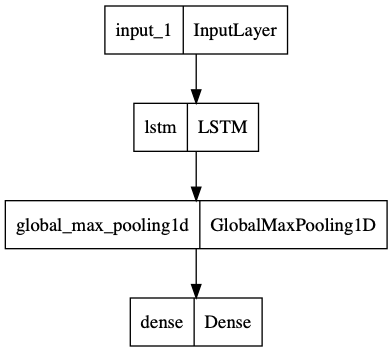

In [8]:
tf.keras.utils.plot_model(model)

In [9]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True
)

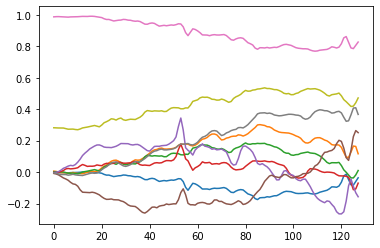

In [10]:
plt.plot(Xtrain[7000, :, :]);

In [11]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs=10,
    callbacks=[check_point],
    validation_data=(Xtest, Ytest)
)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
229/230 [============================>.] - ETA: 0s - loss: 1.0432 - accuracy: 0.6880WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fcb393678c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

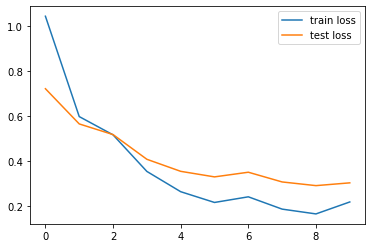

In [13]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

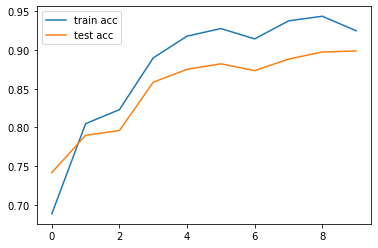

In [14]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [15]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [16]:
# make predictions
Ptest = best_model.predict(Xtest)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
93/93 [==============================] - 1s 8ms/step


In [17]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.8975229046487954

In [18]:
from sklearn.preprocessing import StandardScaler

def load_features():
    # Returns:
    # X_train (Ntrain x D)
    # X test (Xtest x D)

    # train data
    df = pd.read_csv(
        '../DataSamples/UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True
    )

    feat_train = df.to_numpy()

    # test data
    df = pd.read_csv(
        '../DataSamples/UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True
    )

    feat_test = df.to_numpy()

    scaler = StandardScaler()
    feat_train = scaler.fit_transform(feat_train)
    feat_test = scaler.fit_transform(feat_test)

    return feat_train, feat_test

In [19]:
feat_train, feat_test = load_features()

In [20]:
D_feat = feat_train.shape[1]

In [21]:
# RNN
i = Input(shape=(T,D))
x = LSTM(32, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)

# ANN
i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

x = Concatenate()([x, x2])
x = Dense(K)(x)
model = Model([i, i2], x)

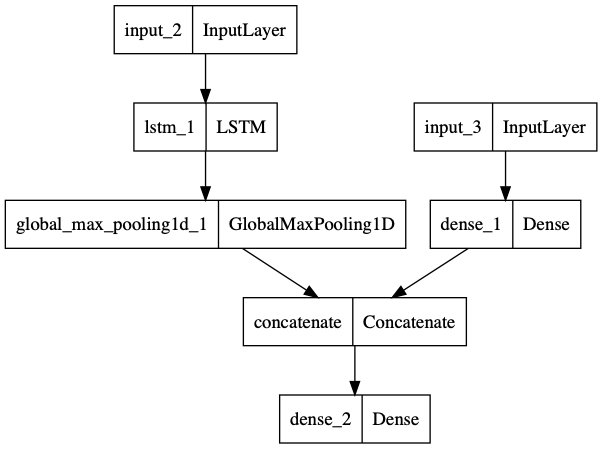

In [22]:
tf.keras.utils.plot_model(model)

In [23]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5',monitor='val_accuracy', save_best_only=True
)

In [24]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
r = model.fit(
    [Xtrain, feat_train],
    Ytrain,
    epochs=15,
    callbacks=[check_point3],
    validation_data=([Xtest, feat_test], Ytest)
)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
229/230 [============================>.] - ETA: 0s - loss: 0.3251 - accuracy: 0.8792WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fcb26936dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

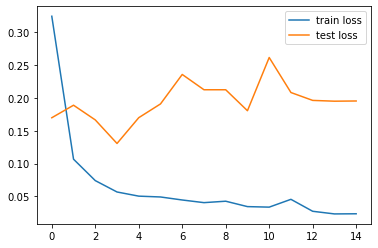

In [26]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

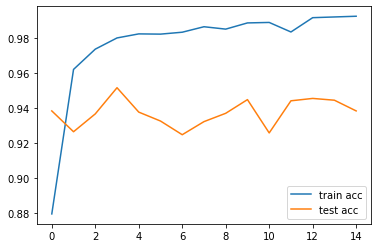

In [27]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [28]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [29]:
# make predictions
Ptest = best_model.predict([Xtest, feat_test])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
93/93 [==============================] - 1s 8ms/step


In [30]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9514760773668137